In [70]:
import pandas as pd
import matplotlib.pyplot as plt

Polecenie 1

In [71]:
output = r"C:\Users\Dell\Desktop\Projekt_PWAI\Dane_meteorologiczne.csv"

df = pd.read_csv(output, header=None)
df.columns = ['Stacja', 'Rok', 'Miesiąc', 'Dzień', 'Maksymalna temperatura', 'Minimalna temperatura', 'Średnia temperatura']

counts = df["Stacja"].value_counts()

full_hist=[]
for miasto in df["Stacja"]:
    if counts.loc[miasto] == 8400:
        if miasto not in full_hist:
            full_hist.append(miasto)
    else:
        continue

print("Miasta z pełną historią:",full_hist)


Miasta z pełną historią: ['BRENNA', 'JABŁONKA', 'ŁAZY', 'JASTRZĘBIA', 'ŁĄCKO', 'KROŚCIENKO', 'NIEDZICA', 'BUKOWINA TATRZAŃSKA', 'DOLINA PIĘCIU STAWÓW', 'SOLINA-JAWOR', 'KOMAŃCZA', 'LGOTA GÓRNA', 'KRAKÓW-OBSERWATORIUM', 'STASZÓW', 'JAROCIN', 'CEBER', 'JARCZEW', 'GORZYŃ', 'WIELICHOWO', 'LEGIONOWO', 'SZEPIETOWO', 'BIAŁOWIEŻA', 'GOLENIÓW', 'CHRZĄSTOWO', 'BIEBRZA-PIEŃCZYKÓWEK', 'RÓŻANYSTOK', 'GDAŃSK-RĘBIECHOWO', 'LIDZBARK WARMIŃSKI']


Polecenie 2

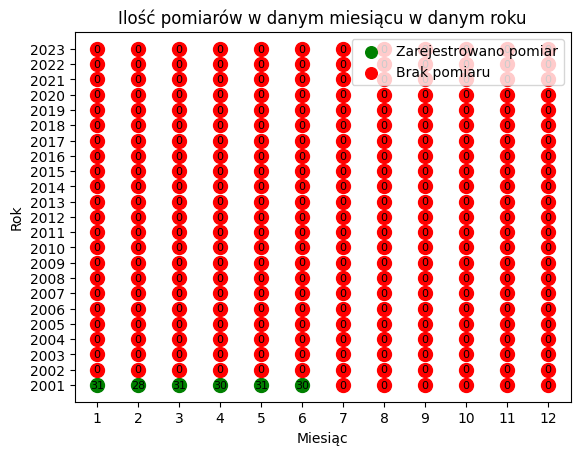

In [76]:
unfull_city = df[df["Stacja"].isin(["PRZEMYŚL"])]

days_per_month = unfull_city.groupby(["Rok","Miesiąc"])["Dzień"].nunique()
counts = days_per_month.unstack(fill_value=0)

for y in range(2001,2024):
    for x in range(1,13):
        if ((unfull_city["Rok"] == y) & (unfull_city["Miesiąc"] == x)).any():
            days = counts.loc[y, x]
            color = "green"
        else:
            color = "red"
            days = 0
        plt.scatter(x, y, color=color, s=100)
        if days>=0:
            plt.text(x, y, str(days), color="black",
                     ha='center', va='center', fontsize=8)


plt.scatter([], [], color="green", s=70, label="Zarejestrowano pomiar")
plt.scatter([], [], color="red", s=70, label="Brak pomiaru")
plt.xticks(ticks=range(1,13), labels=range(1,13))
plt.yticks(ticks=range(2001,2024), labels=range(2001,2024))
plt.xlabel("Miesiąc")
plt.ylabel("Rok")
plt.title("Ilość pomiarów w danym miesiącu w danym roku")
plt.legend()
plt.show()